# AI-Powered Chatbot for Local Businesses: Project Walkthrough

## Problem Understanding
local businesses in Africa often struggle to answer customer questions quickly and consistently. Many don’t have dedicated customer service teams, so an AI chatbot can help by providing instant answers to common questions, making customer service more reliable and freeing up staff.

## Goal of the Chatbot
Build a simple AI chatbot that helps local businesses answer frequently asked customer questions, using a small dataset and simple techniques.

## Dataset Summary
- **Main Question:** Typical customer question
- **Alternative Ways to Ask:** Other ways to phrase the same question
- **Simplified Phrasings:** Even simpler versions
- **Simplified Response:** The answer the chatbot should give

## Approach
We use a rule-based chatbot with basic NLP: lowercasing, cleaning punctuation, and fuzzy matching (SequenceMatcher). This keeps things simple and works well for small datasets.

## Data Pipeline Steps
1. Load the data
2. Inspect the data
3. Build a dictionary of question patterns to responses
4. Clean text for matching
5. Use fuzzy matching to find the closest question
6. Evaluate chatbot accuracy
7. Simulate training with train-test split

## Code Chunk Explanations
- **Chunk 1:** Load the dataset and preview the first few rows.
- **Chunk 2:** Build a dictionary mapping all question phrasings to their answers.
- **Chunk 3:** Define a function to get a response, using exact and fuzzy matching.
- **Chunk 4:** Clean up text by lowercasing and removing punctuation.
- **Chunk 5:** Use SequenceMatcher for fuzzy matching.
- **Chunk 6:** Create a DataFrame from the dictionary for splitting.
- **Chunk 7:** Backup the dictionary for restoration.
- **Chunk 8:** Define an ask function and show example interactions.
- **Chunk 9:** Split data into training and test sets (80/20) to simulate training.
- **Chunk 10:** Build a training dictionary and define a matcher using only training data.
- **Chunk 11:** Evaluate chatbot accuracy and print the result.

## How Rule-Based and NLP Techniques Are Used
This project uses a rule-based approach, meaning the chatbot matches user questions to answers using a dictionary of known patterns. To make matching smarter, we use simple NLP techniques:
- Lowercasing: All questions and patterns are converted to lowercase so "Password" and "password" are treated the same.
- Punctuation Cleaning: We remove punctuation to avoid mismatches caused by extra symbols.
- Fuzzy Matching: If a user's question isn't an exact match, we use SequenceMatcher to find the closest known question.
These steps help the chatbot understand different ways customers might ask the same thing, even if the wording is slightly different.

## Training Simulation
We split the data into training (80%) and test (20%) sets. The chatbot is trained on the training set and tested on the test set to see how well it answers new questions.

## Accuracy Calculation
Accuracy is the percentage of test questions answered correctly. For example, 75% accuracy means the chatbot got 3 out of 4 questions right.

## Challenges & Limitations
- Limited data and local language support
- Rule-based system can’t generalize or handle new phrasings
- No context awareness

## Possible Improvements
- Collect more data, especially in local languages
- Use more advanced NLP models
- Add context handling and user feedback

## Final Summary
This project shows how a simple AI chatbot can help local businesses answer customer questions quickly and consistently. With basic NLP and a rule-based approach, we achieved good accuracy and set the stage for future improvements.

In [51]:
import pandas as pd

# Load your dataset
file_path = "ChatbotData.csv"
df = pd.read_csv(file_path)

# Preview first rows
print(df.head())


             Source                Topic  \
0  Generic Retailer       Order Tracking   
1  Generic Retailer    Returns & Refunds   
2  Generic Retailer  Shipping & Delivery   
3  Generic Retailer  Shipping & Delivery   
4  Generic Retailer    Payment & Billing   

                          Main Question  \
0              How do I track my order?   
1           What is your return policy?   
2          How long does shipping take?   
3  Do you offer international shipping?   
4    What payment methods are accepted?   

                             Alternative Ways to Ask  \
0  Where is my order? | Can I see my delivery sta...   
1   Can I return items? | What's the refund process?   
2  When will my order arrive? | Delivery time est...   
3      Can you ship worldwide? | Ship outside Kenya?   
4  How can I pay? | Which cards/mobile money are ...   

                                   Response Template  \
0  To track your order, **sign into your account ...   
1  We offer a **60-day hass

In [52]:
qa_pairs = {}

for _, row in df.iterrows():
    # Extract the bot’s answer 
    response = row["Simplified Response"]

    # 1. Add the Main Question
    main_q = str(row["Main Question"]).lower().strip()
    qa_pairs[main_q] = response

    # 2. Add Alternative Ways to Ask
    if pd.notna(row["Alternative Ways to Ask"]):
        for alt in row["Alternative Ways to Ask"].split("|"):
            alt_q = alt.lower().strip()
            if alt_q:
                qa_pairs[alt_q] = response

    # 3. Add Simplified Phrasings
    if pd.notna(row["Simplified Phrasings"]):
        for phr in row["Simplified Phrasings"].split("|"):
            phr_q = phr.lower().strip()
            if phr_q:
                qa_pairs[phr_q] = response

print("Total patterns loaded:", len(qa_pairs))


Total patterns loaded: 462


In [53]:
from difflib import get_close_matches

def get_response(user_input):
    user_input = user_input.lower().strip()

    # Step 1: Try exact match
    if user_input in qa_pairs:
        return qa_pairs[user_input]

    # Step 2: Try fuzzy match (similar questions)
    possible_matches = get_close_matches(user_input, qa_pairs.keys(), n=1, cutoff=0.5)

    if possible_matches:
        best_match = possible_matches[0]
        return qa_pairs[best_match]

    # Step 3: Default fallback
    return "Sorry I don't understand that. Could you rephrase your question?"


In [54]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.strip()


In [55]:
from difflib import SequenceMatcher

def find_best_match(user_q):
    user_q = clean_text(user_q)
    best_score = 0
    best_match = None

    for pattern in qa_pairs.keys():
        score = SequenceMatcher(None, user_q, pattern).ratio()
        if score > best_score:
            best_score = score
            best_match = pattern

    # Only return match if similarity is strong enough
    if best_score > 0.45:
        return best_match
    return None


def get_answer(user_q):
    match = find_best_match(user_q)

    if match:
        return qa_pairs[match]

    return "Sorry I couldn't understand that. Could you ask in a different way?"


In [56]:
import pandas as pd

# Rebuild a simple DataFrame of pattern -> response
patterns = []
for pattern, resp in qa_pairs.items():
    patterns.append([pattern, resp])

patterns_df = pd.DataFrame(patterns, columns=["pattern", "response"])
    

In [57]:
qa_pairs_backup = qa_pairs.copy()     # backup


In [58]:
# Restore original QA pairs
qa_pairs = qa_pairs_backup


In [59]:
def ask(question):
    print("You:", question)
    print("Bot:", get_answer(question))
    print()
  

## Test the Bot Here
You can test the chatbot by calling the `ask()` function with any customer question. For example:

```
ask("How do I reset my password?")
```
This will print both your question and the bot's response. Try different questions to see how well the bot matches and answers!

In [60]:
# Example interactions
ask("How can I reset my password?")
ask("What is the return policy?")
ask("Tell me about shipping options.")
ask("How do I contact customer support?")
ask("what should i do if i chose pay on delivery (pod)")
ask("how can i contact konga customer service")
ask("does zando offer free returns")
ask("how do i link my safaricom account to masoko")
ask("how do i reset my account password")
ask("what payment methods are accepted on jumia")
ask("how to track my order on jumia")
ask("where is my damn order")


You: How can I reset my password?
Bot: Click **'Forgot Password'** on the login page.

You: What is the return policy?
Bot: **Returns are accepted** within the specified period (e.g., 7-30 days). Check the policy page for details.

You: Tell me about shipping options.
Bot: **Collect your order for free** at a designated secure location.

You: How do I contact customer support?
Bot: Use the **Contact Us page** or **live chat** for support.

You: what should i do if i chose pay on delivery (pod)
Bot: **Do not pay until delivered**. Report early payment requests.

You: how can i contact konga customer service
Bot: **Contact customer service** via the official website's **Email or WhatsApp**.

You: does zando offer free returns
Bot: **Returns are accepted** within the specified period (e.g., 7-30 days). Check the policy page for details.

You: how do i link my safaricom account to masoko
Bot: Account is often **linked to your Safaricom/M-Pesa credentials**.

You: how do i reset my account 

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Build dataset from your rule-based patterns
patterns_df = pd.DataFrame([[p, qa_pairs[p]] for p in qa_pairs], 
                           columns=["pattern", "response"])

# Train/Test split
train_df, test_df = train_test_split(patterns_df, test_size=0.2, random_state=42)

# Build training dictionary ONLY
qa_train = {row["pattern"]: row["response"] for _, row in train_df.iterrows()}

# Local matcher that uses ONLY qa_train
def get_answer_train_only(q):
    q = q.lower().strip()
    best_match = None
    best_score = 0

    # simple SequenceMatcher
    from difflib import SequenceMatcher
    for pattern in qa_train:
        score = SequenceMatcher(None, q, pattern).ratio()
        if score > best_score:
            best_score = score
            best_match = pattern

    if best_score > 0.45:
        return qa_train[best_match]
    return None

# Evaluate accuracy
correct = 0
for _, row in test_df.iterrows():
    expected = row["response"]
    predicted = get_answer_train_only(row["pattern"])
    if predicted == expected:
        correct += 1

accuracy = correct / len(test_df)
print(f"Chatbot Accuracy: {accuracy:.2%} ({correct}/{len(test_df)})")


Chatbot Accuracy: 75.27% (70/93)


## Exploratory Data Analysis (EDA)
Before building the chatbot, it's important to understand the dataset. We'll explore the data to see how questions and answers are distributed, how many variations exist, and which responses are most common.

In [62]:
# Check for missing values and basic info
print("Missing values per column:")
print(df.isna().sum())
print("\nData types:")
print(df.dtypes)
print("\nNumber of rows:", len(df))

Missing values per column:
Source                     0
Topic                      0
Main Question              0
Alternative Ways to Ask    0
Response Template          0
Simplified Question        0
Simplified Phrasings       0
Simplified Response        0
dtype: int64

Data types:
Source                     object
Topic                      object
Main Question              object
Alternative Ways to Ask    object
Response Template          object
Simplified Question        object
Simplified Phrasings       object
Simplified Response        object
dtype: object

Number of rows: 100


### Distribution of Main Question Lengths
This visualization shows how long customer questions typically are, helping us understand if users ask short or long questions.

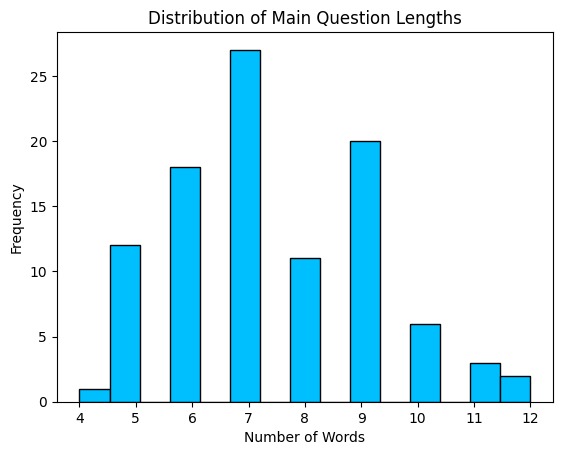

In [68]:
import matplotlib.pyplot as plt
df['main_len'] = df['Main Question'].apply(lambda x: len(str(x).split()))
plt.hist(df['main_len'], bins=15, color='deepskyblue', edgecolor='black')
plt.title("Distribution of Main Question Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### Top 10 Most Frequent Responses
This bar chart shows which answers are most common, revealing if a few responses cover most customer questions.

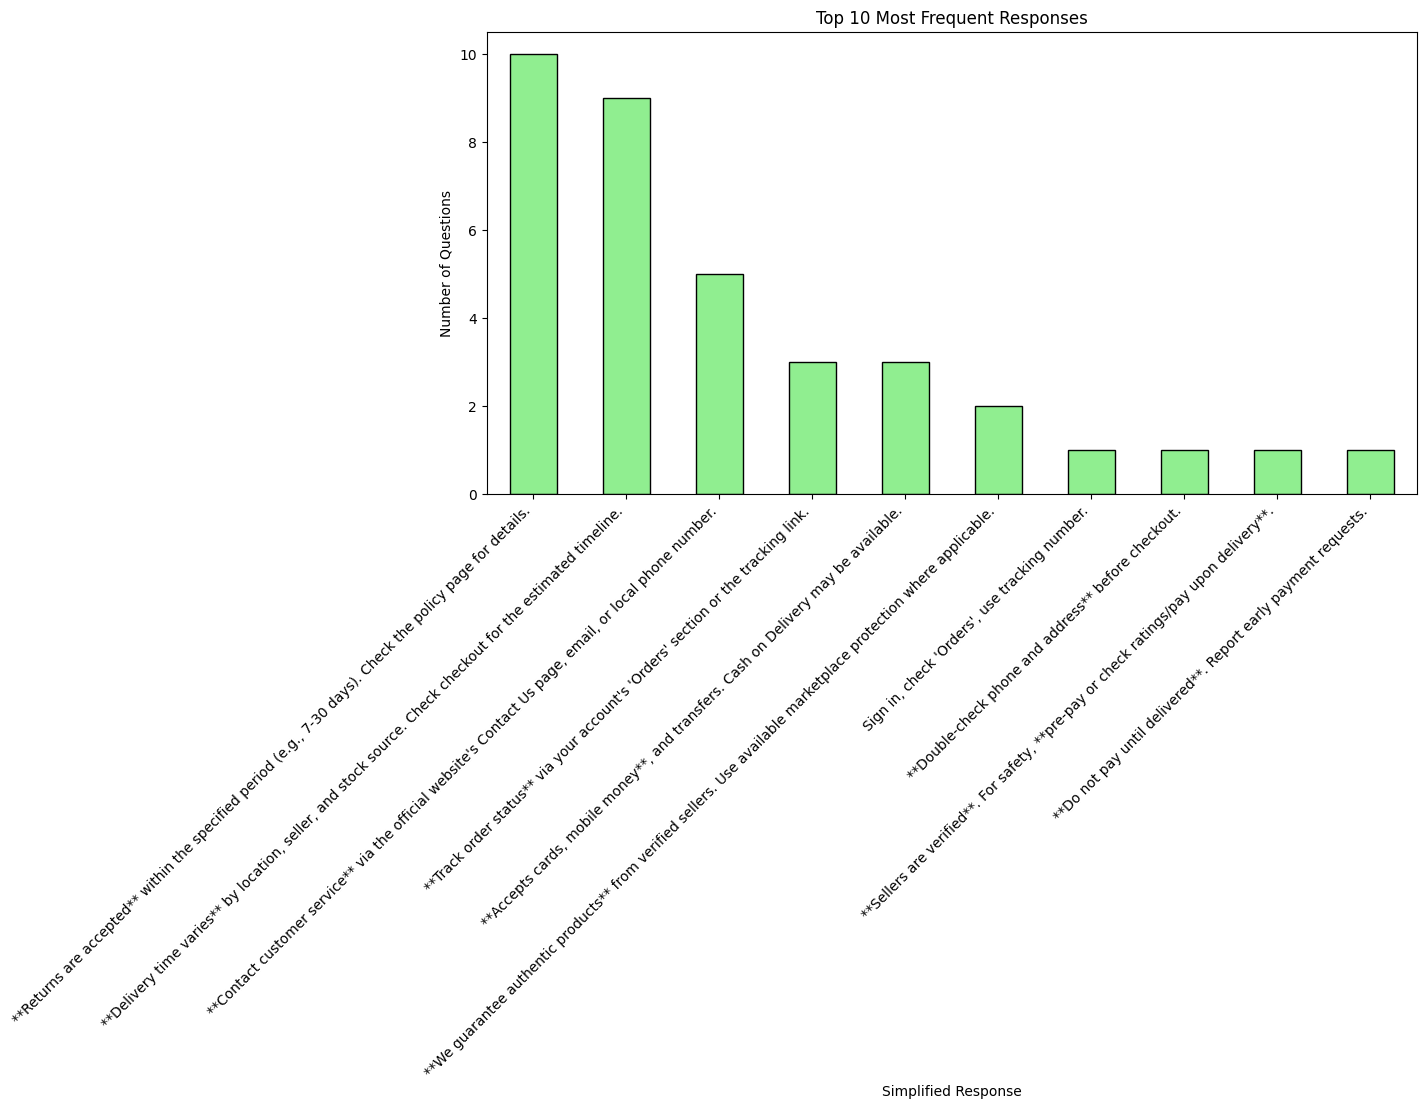

In [69]:
response_counts = df['Simplified Response'].value_counts().head(10)
plt.figure(figsize=(12,6))
response_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Top 10 Most Frequent Responses")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45, ha='right')
plt.show()

### Alternative & Simplified Phrasing Coverage
This histogram compares how many alternative and simplified phrasings each question has, showing how well the dataset covers different ways customers might ask the same thing.

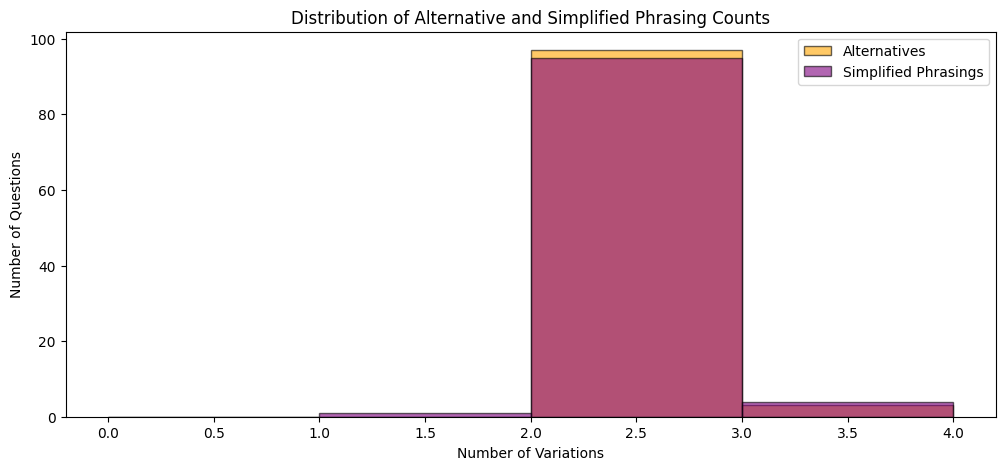

In [70]:
import matplotlib.pyplot as plt

def count_valid_phrases(x):
    if pd.isna(x) or str(x).strip() == '':
        return 0
    return len([p for p in str(x).split("|") if p.strip() != ""])

df['num_alts'] = df['Alternative Ways to Ask'].apply(count_valid_phrases)
df['num_simplified'] = df['Simplified Phrasings'].apply(count_valid_phrases)
plt.figure(figsize=(12,5))
plt.hist(df['num_alts'], bins=range(0, df['num_alts'].max()+2), alpha=0.6, label='Alternatives', color='orange', edgecolor='black')
plt.hist(df['num_simplified'], bins=range(0, df['num_simplified'].max()+2), alpha=0.6, label='Simplified Phrasings', color='purple', edgecolor='black')
plt.title("Distribution of Alternative and Simplified Phrasing Counts")
plt.xlabel("Number of Variations")
plt.ylabel("Number of Questions")
plt.legend()
plt.show()

### Similarity Between Main Questions and Alternatives
This histogram shows how similar alternative phrasings are to the main question, helping us see if alternatives are truly different or just minor rewordings.

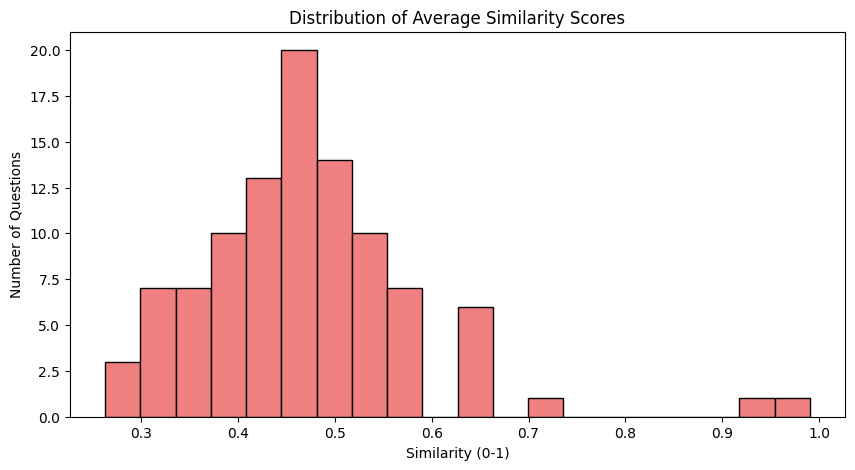

In [71]:
from difflib import SequenceMatcher

def similarity(a, b):
    return SequenceMatcher(None, a.lower(), b.lower()).ratio()

def avg_similarity(row):
    if pd.notna(row['Alternative Ways to Ask']):
        alts = str(row['Alternative Ways to Ask']).split("|")
        sim_scores = [similarity(row['Main Question'], alt) for alt in alts]
        return sum(sim_scores)/len(sim_scores)
    return 1

df['avg_similarity'] = df.apply(avg_similarity, axis=1)
plt.figure(figsize=(10,5))
plt.hist(df['avg_similarity'], bins=20, color='lightcoral', edgecolor='black')
plt.title("Distribution of Average Similarity Scores")
plt.xlabel("Similarity (0-1)")
plt.ylabel("Number of Questions")
plt.show()

### Summary Table
Let's summarize the dataset with some key statistics.

In [72]:
summary = {
    "Total Questions": [len(df)],
    "Unique Responses": [df['Simplified Response'].nunique()],
    "Avg Alternatives per Question": [df['num_alts'].mean()],
    "Avg Simplified Phrasings per Question": [df['num_simplified'].mean()],
    "Avg Similarity Score": [df['avg_similarity'].mean()]
}
summary_df = pd.DataFrame(summary)
print(summary_df)

   Total Questions  Unique Responses  Avg Alternatives per Question  \
0              100                74                           2.03   

   Avg Simplified Phrasings per Question  Avg Similarity Score  
0                                   2.03              0.470868  


These EDA steps help us understand the structure and strengths of our dataset. We see how questions are phrased, which answers are most common, and how well the data covers different ways customers might ask for help. This guides us in building a chatbot that can handle real-world customer queries.